In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('./finset.csv')
data

,sector,marketcap,anrevenue,size,roi
0,telecom,12,1.0,250,8
1,telecom,18,1.5,5000,5
2,manufacturing,60,2.0,5000,9
3,retail,20,3.0,50,10
4,retail,25,2.0,250,11
...,...,...,...,...,...
94,manufacturing,62,10.0,5000,12
95,manufacturing,67,9.0,5000,12
96,manufacturing,58,9.5,5000,13
97,manufacturing,57,9.1,5000,14


In [68]:
data.isnull().any()

sector       False
marketcap    False
anrevenue    False
size         False
roi          False
dtype: bool

In [69]:
data.groupby('sector').mean()

,marketcap,anrevenue,size,roi
sector,,,,
manufacturing,59.596154,8.353846,4451.923077,9.250000
retail,20.681818,2.045455,2552.272727,10.318182
telecom,11.120000,1.308000,1952.000000,11.600000


In [70]:
data.sort_values('roi')

,sector,marketcap,anrevenue,size,roi
98,manufacturing,60,9.2,5000,1
39,telecom,14,1.2,5000,1
48,manufacturing,60,5.0,5000,1
13,retail,14,1.5,5000,1
40,telecom,14,2.0,250,2
...,...,...,...,...,...
91,manufacturing,60,13.7,5000,30
35,telecom,11,1.5,5000,34
92,manufacturing,61,14.8,250,35
37,telecom,13,1.3,5000,45


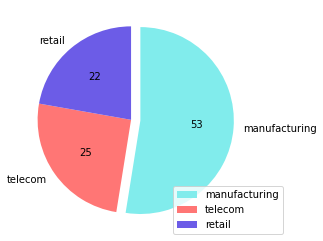

In [71]:
freq = data.value_counts("sector")
colors = ['#81ecec','#ff7675','#6c5ce7']
plt.pie(freq, labels = freq.index, explode = (0.1, 0, 0), autopct = '%.0f', colors = colors, startangle = 90, counterclock = False)
plt.axis('square')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.2))
plt.show()

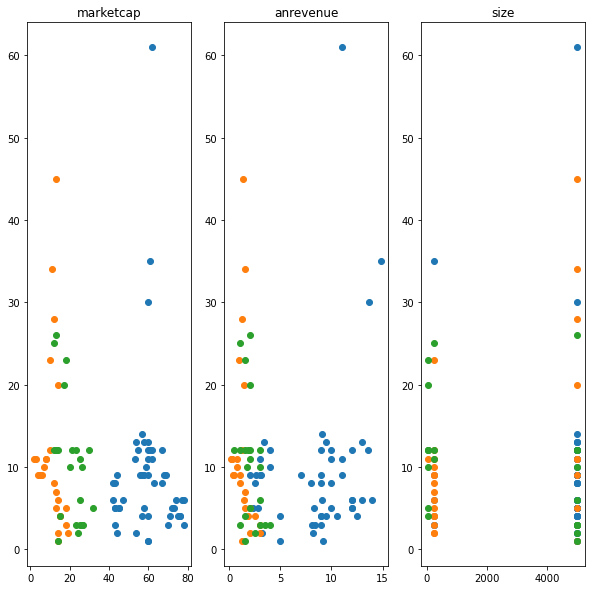

In [72]:
data_roi = data.sort_values('roi')
fig, axes = plt.subplots(1, 3, figsize=(10,10))
for index, item in enumerate(['marketcap', 'anrevenue', 'size']):
    axes[index].set_title(item)
    for i in data_roi['sector'].drop_duplicates():
        x = data_roi[data_roi['sector']==i][item]
        y = data_roi[data_roi['sector']==i]['roi']
        axes[index].scatter(x, y)

plt.show()

New shape:  (91, 5)


<AxesSubplot:xlabel='roi'>

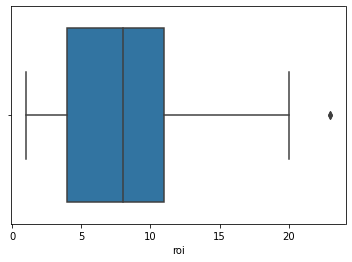

In [74]:
q1 = np.percentile(data['roi'], 25, interpolation='midpoint')
q3 = np.percentile(data['roi'], 75, interpolation='midpoint')
iqr = q3 - q1
upper = np.where(data['roi'] >= (q3 + 1.5*iqr))
lower = np.where(data['roi'] <= (q1 - 1.5*iqr))
data_temp = data
data_temp = data_temp.drop(upper[0])
data_temp = data_temp.drop(lower[0])
print('New shape: ', data_temp.shape)
sns.boxplot(x='roi', data=data_temp)

New shape:  (85, 5)


<AxesSubplot:xlabel='roi'>

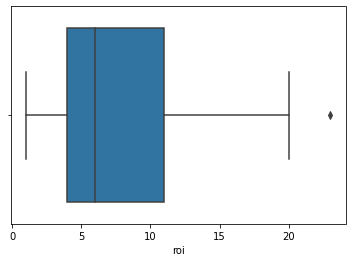

In [79]:
q1 = np.percentile(data_temp['roi'], 25, interpolation='midpoint')
q3 = np.percentile(data_temp['roi'], 75, interpolation='midpoint')
iqr = q3 - q1
upper = np.where(data_temp['roi'] >= (q3 + 1.5*iqr))
lower = np.where(data_temp['roi'] <= (q1 - 1.5*iqr))
data_temp = data_temp.drop(upper[0])
data_temp = data_temp.drop(lower[0])
print('New shape: ', data_temp.shape)
sns.boxplot(x='roi', data=data_temp)